In [1]:
import corneto as cnt
cnt.info()

CORNETO v0.9.1-alpha.0 (up to date)
Available backends:  CVXPY v1.3.0, PICOS v2.4.1
Default backend (corneto.K): CVXPY
Available solvers for CVXPY: CBC, CPLEX, CVXOPT, ECOS, ECOS_BB, GLPK, GLPK_MI, GUROBI, MOSEK, OSQP, SCIP, SCIPY, SCS
Graphviz available: v0.20.1.
https://github.com/saezlab/corneto


## Toy example 1

From https://saezlab.github.io/CARNIVAL/articles/CARNIVAL.html

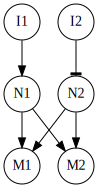

In [2]:
G = cnt.Graph.from_sif_tuples(
    [
        ('I1', 1, 'N1'),
        ('N1', 1, 'M1'),
        ('N1', 1, 'M2'),
        ('I2', -1, 'N2'),
        ('N2', 1, 'M2'),
        ('N2', 1, 'M1')
    ]
)
# Also:
# cnt.Graph.from_sif('sif_file.sif')
G.to_graphviz()

In [3]:
from corneto.methods import runVanillaCarnival

measurements = {'M1': 1, 'M2': 1}
perturbations = {'I1': 1, 'I2': 1}
p, Gf = runVanillaCarnival(perturbations, measurements, G, solver='GLPK_MI')

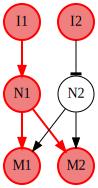

In [4]:
G.to_graphviz(problem=p, graph_attr=dict(size="5"))

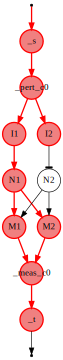

In [5]:
Gf.to_graphviz(problem=p, graph_attr=dict(size="5"))

## Toy example 2

Inverse carnival (unknown perturbations)

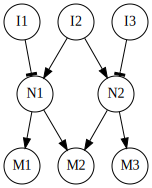

In [6]:
from corneto.methods import runInverseCarnival

G = cnt.Graph.from_sif_tuples(
    [
        ('I1', -1, 'N1'),
        ('I2', 1, 'N1'),
        ('I2', 1, 'N2'),
        ('I3', -1, 'N2'),
        ('N1', 1, 'M1'),
        ('N1', 1, 'M2'),
        ('N2', 1, 'M2'),
        ('N2', 1, 'M3')
    ]
)
# Also:
# cnt.Graph.from_sif('sif_file.sif')
G.to_graphviz()

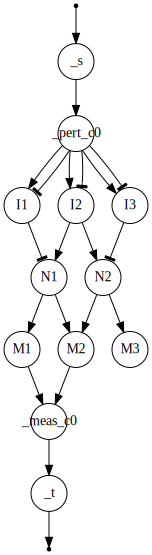

In [10]:
p, Gf = runInverseCarnival({'M1': 1, 'M2': 1}, G, solver='GLPK_MI')
# This is the extended flow graph generated based on the data to solve inverse carnival
Gf.to_graphviz()

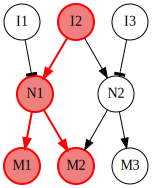

In [11]:
G.to_graphviz(problem=p, graph_attr=dict(size="5"))